# Titanic Challenge

Minha versão do desafio do Titanic, disponivel no link: [Titanic Dataset](https://www.kaggle.com/c/titanic)

## **Lista de afazeres:**

- ~~Importar dados~~
- ~~Verificar estado dados~~

   ### *Graficos basicos*
- Grafico sobreviventes
- Grafico sobreviventes por genero
- Grafico sobreviventes por classe
- Distribuicao de pessoas por idade
- Distribuicao de preco do ticket
    ### *Tratamento dados*
- Tratar coluna "Age"
- Tratar coluna "Cabin"
- Tratar colunas para regressao logistica

    ### *Regressao Logistica*
- Construir modelo
- Treinar modelo
- Precisao do modelo

    ### *Outras features*
- Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
- Maybe the Cabin letter could be a feature
- Is there any info you can get from the ticket?

### Import de bibliotecas

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Carregamento e verificação de dataset

In [30]:
DATASET_DIR = "./dataset/"

df_titanic_train = pd.read_csv(DATASET_DIR + "train.csv")
df_titanic_test = pd.read_csv(DATASET_DIR + "test.csv")

In [31]:
df_titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df_titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
df_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [35]:
df_titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Verifcação qualidade dataset

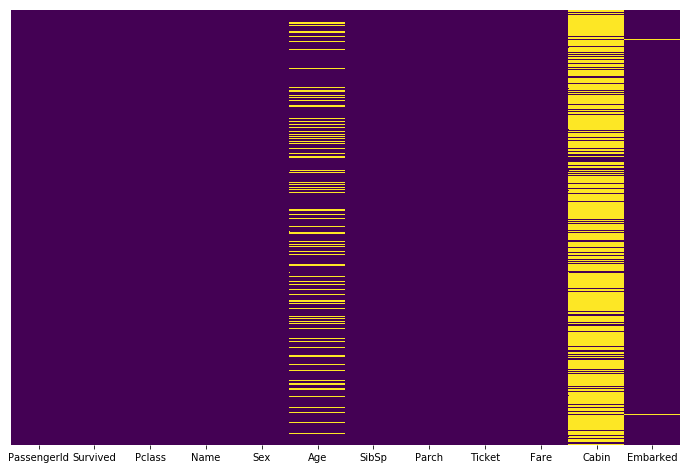

In [34]:
f,ax = plt.subplots(figsize = (12,8))
sns.heatmap(df_titanic_train.isnull(),yticklabels=False,cbar=False, cmap="viridis", ax=ax)

O dataset possui a coluna "Age" e "Cabin" com alto grau de dados nulos.

### Graficos basicos

Grafico sobreviventes

Grafico sobreviventes por genero

Grafico sobreviventes por classe


Distribuicao de pessoas por idade


Distribuicao de preco do ticket